# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from scipy.stats import norm
from scipy.stats import t

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

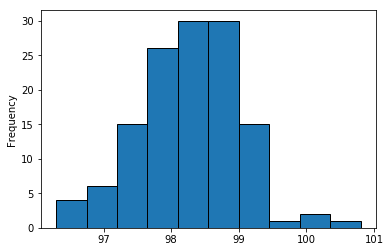

In [2]:
df['temperature'].plot(kind='hist', edgecolor='k')
plt.show()

### The distribution of body temperatures appears to be normally distributed (maybe a bit right skewed?).

## 2. Is the sample size large? Are the observations independent?

In [3]:
print("Number of observations: {}".format(df.shape[0]))

Number of observations: 130


### The sample size is large enough. According to the source of the dataset, the data was constructed to match a dataset that took several measurements from the 148 men and women 1-4 times daily, which may indicate that some of the observations may not be independent.

## 3. Is the true population mean really 98.6 degrees F?

In [4]:
# First, using bootstrap samples
temps = df['temperature']
n = temps.shape[0]
temps_mean = temps.mean()
print("Sample mean: {}".format(temps_mean))

mu = 98.6
hypothesis_temps = temps - temps_mean + mu
bootstrap_samples = [np.random.choice(hypothesis_temps, n) for _ in range(10000)]
bootstrap_samples = np.array(bootstrap_samples)

bootstrap_means = bootstrap_samples.mean(axis=1)
p_value = (bootstrap_means < temps_mean).mean()

ci = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% confidence interval: ({}, {})".format(*ci))
ci = np.percentile(bootstrap_means, [0.5, 99.5])
print("99% confidence interval: ({}, {})".format(*ci))
print("p_value: {}".format(p_value))

Sample mean: 98.24923076923078
95% confidence interval: (98.47615384615384, 98.72615384615384)
99% confidence interval: (98.4353846153846, 98.76538461538459)
p_value: 0.0


### The sample mean is 98.249, less than the hypothesized population mean. From the bootstrapping test, we can see the p value is extremely small (meaning none of the 10000 were as extreme as the sample mean). Furthermore, the confidence interval for the hypothesis mean does not even come close to the sample mean. The data suggests the true population mean for body temperature is less than 98.6 

In [5]:
# Using a one sample z-test
temps_var = temps.var()
z_score = (temps_mean - mu) / np.sqrt(temps_var / n)
p_value = norm.cdf(z_score)
print("z-test p_value: {}".format(p_value))

t_score = (temps_mean - mu) / np.sqrt(temps_var / n)
p_value = t.cdf(t_score, n - 1)
print("t-test p_value: {}".format(p_value))

z-test p_value: 2.45107850705669e-08
t-test p_value: 1.2053160207804971e-07


### We use a one-sample z-test here because we have a one sample with a large number of observations (n > 30). With the z-test, we got a p_value of 2.45e-08.

### The t-test is used when sample size is small and population variance is unknown. With lower degrees of freedom, the t-distribution has heavier tails, as it is robust to outliers. When degrees of freedom increase, the t-distribution converges to the standard nomral distribution. Here, we can see that the p values are similar, but the p value for the t test is a bit higher because it is more forgiving of outliers in the dataset.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [8]:
# Using a one sample z-test
sample_size = 10
temp_samples = df['temperature'].sample(sample_size)
sample_mean = temps.mean()
sample_var = temps.var()

z_score = (sample_mean - mu) / np.sqrt(sample_var / sample_size)
p_value = norm.cdf(z_score)
print("z-test p_value: {}".format(p_value))

t_score = (sample_mean - mu) / np.sqrt(sample_var / sample_size)
p_value = t.cdf(t_score, sample_size - 1)
print("t-test p_value: {}".format(p_value))

z-test p_value: 0.0651530676032717
t-test p_value: 0.08229965403110287


### The t-test should be used when sample size is small and population variance is unknown. Once again, the p value for the t-test is higher than the p value from the z-test. In other words, we can see that the t-test is more conservative (it won't reject the null hypothesis even when outliers are in the sample).

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [10]:
# Using bootstrap samples
bootstrap_samples = np.array([np.random.choice(temps, n) for _ in range(10000)])
bootstrap_means = bootstrap_samples.mean(axis=1)

ci = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% confidence interval: ({}, {})".format(*ci))
ci = np.percentile(bootstrap_means, [0.5, 99.5])
print("99% confidence interval: ({}, {})".format(*ci))

95% confidence interval: (98.12536538461538, 98.3753846153846)
99% confidence interval: (98.08998076923078, 98.41692307692308)


### With a 99% confidence interval, temperature may be considered abnormal if it goes below 98.1 or above 98.4 degrees Farenheight.

In [30]:
# Using z-test
critical_value = norm.ppf(0.975)
diff = critical_value * np.sqrt(temps_var / n) 
ci = [temps_mean - diff, temps_mean + diff]
print("95% confidence interval: ({}, {})".format(*ci))

critical_value = norm.ppf(0.995)
diff = critical_value * np.sqrt(temps_var / n) 
ci = [temps_mean - diff, temps_mean + diff]
print("99% confidence interval: ({}, {})".format(*ci))

95% confidence interval: (98.12319642818166, 98.3752651102799)
99% confidence interval: (98.08359356799211, 98.41486797046944)


### We got very similar results with the z test as we did with bootstrap sampling method.

## 6. Is there a significant difference between males and females in normal temperature?

In [32]:
male_temps = df[df['gender'] == 'M']['temperature']
female_temps = df[df['gender'] == 'F']['temperature']

male_size = male_temps.shape[0]
female_size = female_temps.shape[0]

male_mean = male_temps.mean()
female_mean = female_temps.mean()

male_var = male_temps.var()
female_var = female_temps.var()

z_score = (male_mean - female_mean) / np.sqrt( (male_var / male_size) + (female_var / female_size) )
p_value = norm.cdf(z_score)
print("z-test p_value: {}".format(p_value))

z-test p_value: 0.01114368038033863


In [33]:
observed_diff = male_mean - female_mean
male_bs = np.array([np.random.choice(male_temps - male_mean, male_size) for _ in range(10000)])
female_bs = np.array([np.random.choice(female_temps - female_mean, female_size) for _ in range(10000)])

male_bs_means = male_bs.mean(axis=1)
female_bs_means = female_bs.mean(axis=1)

bs_diff = male_bs_means - female_bs_means
p_value = (bs_diff <= observed_diff).mean()
print("percentage bootstrapping p_value: {}".format(p_value))

0.0115

### Using the z test and bootstrap test, we got similar p_values (~0.011), showing that male and females do have a statistically significant difference in their body temperatures. I prefer to use the z test because it is more computationally efficient.